<a href="https://colab.research.google.com/github/javiervasquezufm/ELEMENTS-OF-MACHINE-LEARNING/blob/master/BestSubset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import itertools
import time
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Mejor subconjunto - Best subset

1. Sea $\mathcal{M}_0$ el *modelo nulo*, el cual no contiene predictores (i.e., predice la media de las muestras para cada observación)
2. Para $k=1,\dotsc,p$:

  a. Ajustamos todos los $\binom{p}{k}=\frac{p!}{k!(p-k)!}$ modelos que contienen $k$ predictores
  
  b. Elegimos el mejor modelo de estos y lo llamamos $\mathcal{M}_k$. Definimos *mejor* como el que tiene el RSS más bajo, o el $R^2$ más alto

3. Seleccionamos el mejor de los modelos $\mathcal{M}_0,\dotsc,\mathcal{M}_p$ usando validación cruzada para el error de predicción, $C_p$ (AIC), BIC, o $R^2$ ajustado (por definir)

In [0]:
credit = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Credit.csv', index_col=0)

credit = pd.get_dummies(credit, columns=['Gender', 'Student', 'Married', 'Ethnicity'], drop_first=True)

In [0]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [0]:
Y = credit.Balance
X = credit.drop(columns='Balance', axis=1)
k = 11

RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

from tqdm import tnrange, tqdm_notebook

for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))

In [0]:
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

In [0]:
df

,RSS,R_squared,features,numb_features
0,6.620874e+07,0.214977,"(Income,)",1
1,2.171566e+07,0.742522,"(Limit,)",1
2,2.143512e+07,0.745848,"(Rating,)",1
3,8.370950e+07,0.007475,"(Cards,)",1
4,8.433963e+07,0.000003,"(Age,)",1
5,8.433443e+07,0.000065,"(Education,)",1
6,8.430102e+07,0.000461,"(Gender_Male,)",1
7,7.868154e+07,0.067090,"(Student_Yes,)",1
8,8.433720e+07,0.000032,"(Married_Yes,)",1
9,8.433179e+07,0.000096,"(Ethnicity_Asian,)",1


In [0]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)

In [0]:
df.shape

(2047, 6)

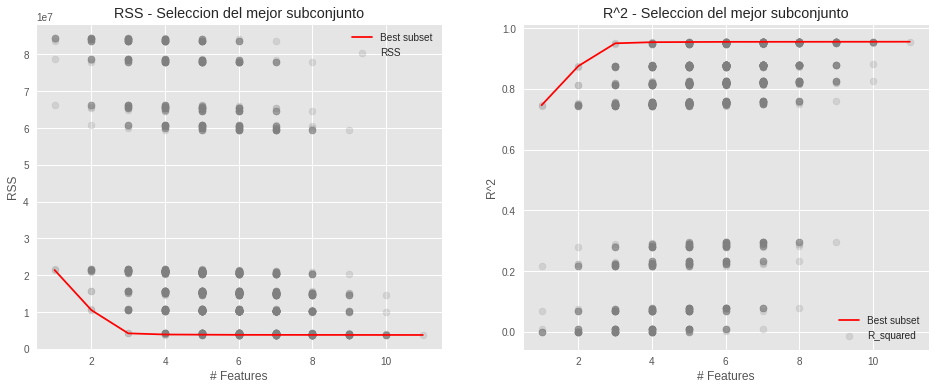

In [0]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'gray' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Seleccion del mejor subconjunto')
ax.plot(df.numb_features,df.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.R_squared, alpha = .2, color = 'gray' )
ax.plot(df.numb_features,df.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R^2')
ax.set_title('R^2 - Seleccion del mejor subconjunto')
ax.legend()

plt.show()

# Selección por pasos de avance - Forward stepwise selection

1. Sea $\mathcal{M}_0$ el *modelo nulo*, el cual no contiene predictores (i.e., predice la media de las muestras para cada observación
2. Para $k=0,\dotsc,p-1$:

  a. Consideramos todos los $p-k$ modelos que incrementen los números de predictores en $\mathcal{M}_k$ por uno
  
  b. Elegimos el mejor de estos $p-k$ modelos y lo llamamos $\mathcal{M}_{k+1}$. Definimos *mejor* como el que tiene el RSS más bajo, o el $R^2$ más alto

3. Seleccionamos el mejor de los modelos $\mathcal{M}_0,\dotsc,\mathcal{M}_p$ usando validación cruzada para el error de predicción, $C_p$ (AIC), BIC, o $R^2$ ajustado (por definir)

In [0]:
Y = credit.Balance
X = credit.drop(columns = 'Balance', axis = 1)
k = 11

remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

In [0]:
print('Numero de parametros |', 'Parametros |', 'RSS')
[(i,features_list[i], round(RSS_list[i])) for i in range(1,5)]

Numero de parametros | Parametros | RSS


[(1, ['Rating'], 21435122.0),
 (2, ['Rating', 'Income'], 10532541.0),
 (3, ['Rating', 'Income', 'Student_Yes'], 4227219.0),
 (4, ['Rating', 'Income', 'Student_Yes', 'Limit'], 4032502.0)]

# $C_p$ de Mallow

$$ C_p = \frac{1}{n}(\text{RSS}+2d\hat\sigma^2)$$

# AIC

$$ C_p = \frac{1}{n\hat\sigma^2}(\text{RSS}+2d\hat\sigma^2)$$

# BIC

$$ C_p = \frac{1}{n}(\text{RSS}+\log{(n)}d\hat\sigma^2)$$

# $R^2$ ajustado

$$ R^2\text{ ajustado} = 1-\frac{\text{RSS}/(n-d-1)}{\text{TSS}/(n-1)}=1-(1-R^2)\frac{n-1}{n-d-1} $$

In [0]:
df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

In [0]:
#Initializing useful variables
n = len(Y)
p = 11
hat_sigma_squared = (1/(n - p - 1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/n) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(n*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/n) * (df1['RSS'] +  np.log(n) * df1['numb_features'] * hat_sigma_squared )
df1['R2_ajustado'] = 1 - ( (1 - df1['R_squared'])*(n-1)/(n-df1['numb_features'] -1))
df1


,features,RSS,R_squared,numb_features,C_p,AIC,BIC,R2_ajustado
1,[Rating],2.143512e+07,0.745848,1,53636.603151,5.495771,53733.991033,0.745210
2,"[Rating, Income]",1.053254e+07,0.875118,2,26428.949364,2.707991,26623.725129,0.874489
3,"[Rating, Income, Student_Yes]",4.227219e+06,0.949879,3,10714.442485,1.097835,11006.606131,0.949499
4,"[Rating, Income, Student_Yes, Limit]",4.032502e+06,0.952188,4,10276.446437,1.052956,10665.997966,0.951703
5,"[Rating, Income, Student_Yes, Limit, Cards]",3.866091e+06,0.954161,5,9909.218362,1.015329,10396.157773,0.953579
6,"[Rating, Income, Student_Yes, Limit, Cards, Age]",3.821620e+06,0.954688,6,9846.837591,1.008937,10431.164884,0.953996
7,"[Rating, Income, Student_Yes, Limit, Cards, Ag...",3.810759e+06,0.954817,7,9868.483418,1.011155,10550.198593,0.954010
8,"[Rating, Income, Student_Yes, Limit, Cards, Ag...",3.804746e+06,0.954888,8,9902.248962,1.014615,10681.352019,0.953965
9,"[Rating, Income, Student_Yes, Limit, Cards, Ag...",3.798367e+06,0.954964,9,9935.100415,1.017981,10811.591354,0.953924
10,"[Rating, Income, Student_Yes, Limit, Cards, Ag...",3.791345e+06,0.955047,10,9966.344067,1.021182,10940.222888,0.953891


In [0]:
print(df1['R2_ajustado'].idxmax())
print(df1['R2_ajustado'].max())

0
inf


Text(0.5, 0.98, 'Seleccion de mejor subconjunto usando C_p, AIC, BIC y R2 ajustado')

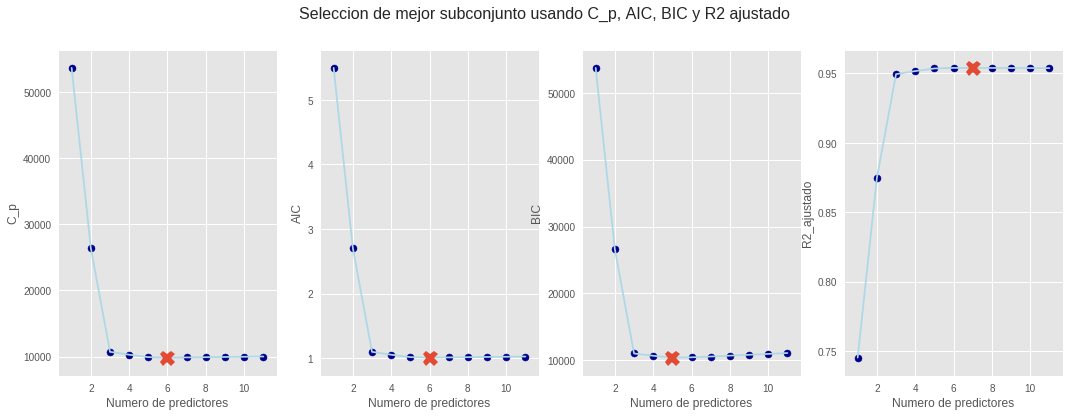

In [0]:
variables = ['C_p', 'AIC','BIC','R2_ajustado']
fig = plt.figure(figsize = (18,6))

for i,v in enumerate(variables):
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(df1['numb_features'],df1[v], color = 'lightblue')
    ax.scatter(df1['numb_features'],df1[v], color = 'darkblue')
    if v == 'R2_ajustado':
        ax.plot(df1[v].idxmax(),df1[v].max(), "X", markersize = 15)
    else:
        ax.plot(df1[v].idxmin(),df1[v].min(), "X", markersize = 15)
    ax.set_xlabel('Numero de predictores')
    ax.set_ylabel(v)

fig.suptitle('Seleccion de mejor subconjunto usando C_p, AIC, BIC y R2 ajustado', fontsize = 16)